# Setup

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from prepare import git_df, code_language
from acquire import git_data
from formating import bold, display, Latex, Markdown, percent, Percent, strike, underline
from textblob import TextBlob
from wordcloud import WordCloud
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [2]:
df = git_df()

In [3]:
df[df.language.isnull() == True]

Empty DataFrame
Columns: [index, repo, language, original, clean, stemmed, lemmatized, original_length, true_clean]
Index: []

In [4]:
df

index                                   repo          language  \
0        0    0voice/interview_internal_reference            Python   
1        1                           2dust/v2rayN                C#   
2        2          30-seconds/30-seconds-of-code        JavaScript   
3        3               521xueweihan/HelloGitHub            Python   
4        4                           Airblader/i3                 C   
..     ...                                    ...               ...   
595    596                          yuzu-emu/yuzu               C++   
596    597                          zealdocs/zeal               C++   
597    598              zergtant/pytorch-handbook  Jupyter Notebook   
598    599  zero-to-mastery/start-here-guidelines            Python   
599    600                            zxing/zxing              Java   

                                              original  \
0    \n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...   
1    # v2rayN\nA V2Ray client for Windows, support ...   
2    [![Logo](/logo.png)](https://30secondsofcode.o...   
3    <p align="center">\n  <img src="https://cdn.js...   
4    [![Build Status](https://github.com/Airblader/...   
..                                                 ...   
595  <!--\nSPDX-FileCopyrightText: 2018 yuzu Emulat...   
596  # Zeal\n\n[![Changelog](https://img.shields.io...   
597  # PyTorch 中文手册（pytorch handbook）\r\n![pytorch]...   
598  Guidelines on how this open-source community w...   
599  <img align="right" src="https://raw.github.com...   

                                                 clean  \
0    mysql redis mongodb zookeeper nginx cpu idh ea...   
1    vrayn vray client windows support xray corehtt...   
2    logologopnghttpssecondsofcodeorgjsp seconds co...   
3    aligncenter srchttpscdnjsdelivrnetghxueweihani...   
4    build statushttpsgithubcomairbladeriactionswor...   
..                                                 ...   
595  spdxfilecopyrighttext yuzu emulator project sp...   
596  zeal changeloghttpsimgshieldsiogithubreleaseze...   
597  pytorch pytorch handbook pytorchpytorchlogodar...   
598  guidelines opensource community works read see...   
599  alignright srchttpsrawgithubcomwikizxingzxingz...   

                                               stemmed  \
0    mysql redi mongodb zookeep nginx cpu idh eaebd...   
1    vrayn vray client window support xray corehttp...   
2    logologopnghttpssecondsofcodeorgjsp second cod...   
3    aligncent srchttpscdnjsdelivrnetghxueweihanimg...   
4    build statushttpsgithubcomairbladeriactionswor...   
..                                                 ...   
595  spdxfilecopyrighttext yuzu emul project spdxli...   
596  zeal changeloghttpsimgshieldsiogithubreleaseze...   
597  pytorch pytorch handbook pytorchpytorchlogodar...   
598  guidelin opensourc commun work read see join e...   
599  alignright srchttpsrawgithubcomwikizxingzxingz...   

                                            lemmatized  original_length  \
0    mysql redis mongodb zookeeper nginx cpu idh ea...            37402   
1    vrayn vray client window support xray corehttp...             1371   
2    logologopnghttpssecondsofcodeorgjsp second cod...             1931   
3    aligncenter srchttpscdnjsdelivrnetghxueweihani...             5152   
4    build statushttpsgithubcomairbladeriactionswor...             4737   
..                                                 ...              ...   
595  spdxfilecopyrighttext yuzu emulator project sp...             4460   
596  zeal changeloghttpsimgshieldsiogithubreleaseze...             3166   
597  pytorch pytorch handbook pytorchpytorchlogodar...             3472   
598  guideline opensource community work read see j...             7483   
599  alignright srchttpsrawgithubcomwikizxingzxingz...             6834   

                                            true_clean  
0    attached storage ping ping hive hive static fl...  
1    client window support core core core core

In [5]:
# df = git_df()
python = code_language(words= ' '.join(df[df.language == 'Python'].true_clean), label= 'Python')
html = code_language(words= ' '.join(df[df.language == 'HTML'].true_clean), label= 'HTML')
c = code_language(words= ' '.join(df[df.language == 'C'].true_clean), label= 'C')
cplusplus = code_language(words= ' '.join(df[df.language == 'C++'].true_clean), label= 'C++')
php = code_language(words= ' '.join(df[df.language == 'PHP'].true_clean), label= 'PHP')
other = code_language(words= ' '.join(df[(df.language == 'C#' )|\
                                         (df.language == 'Java')|\
                                         (df.language == 'Jupyter Notebook')|\
                                         (df.language == 'Typescript')|\
                                         (df.language == 'JavaScript')].true_clean), label= 'Other')

languages = [python, html, c, cplusplus, php, other]

In [6]:
# from string import ascii_lowercase
# from itertools import product

# letters = []

# for length in range(1, 3):
#     for combo in product(ascii_lowercase, repeat=length):
#         letters.append(''.join(combo))

In [7]:
# df['true_clean'].str.findall('\w{,12}').str.join(' ').str.findall('\w{4,}').str.join(' ')

In [8]:
# from textblob import TextBlob
# #Type in the incorrect spelling
# a = "Thers otther thangs int heer"
# print("original text: "+str(a))
# b = TextBlob(a)
# #Obtain corrected spelling as an output
# print("corrected text: "+str(b.correct()))

In [9]:
# str(TextBlob(df.true_clean[1]).correct())

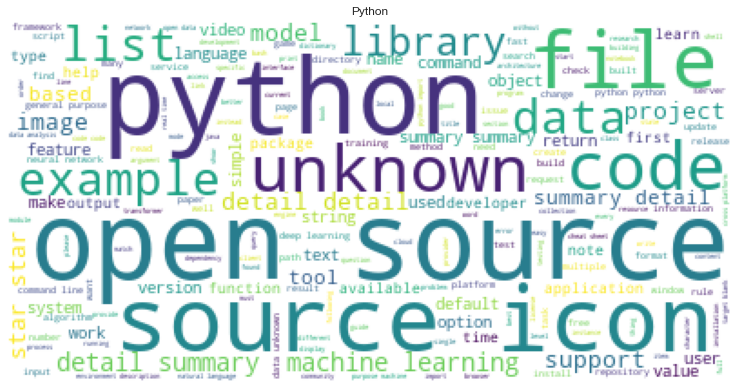

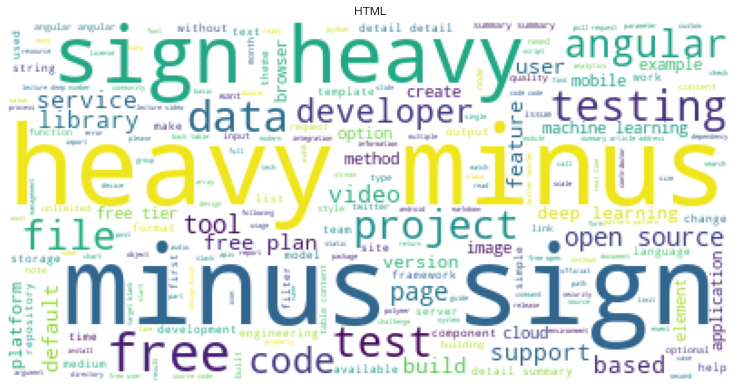

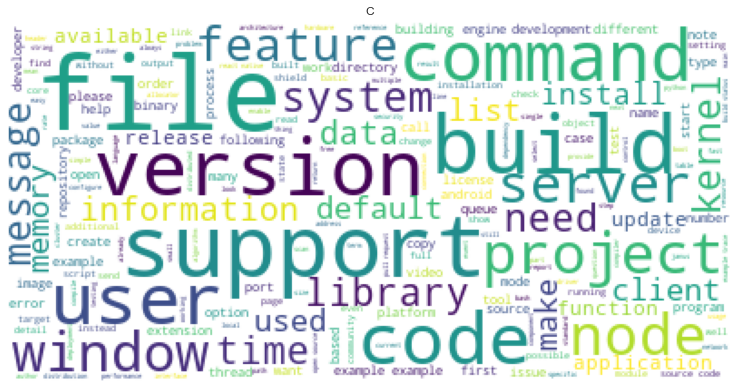

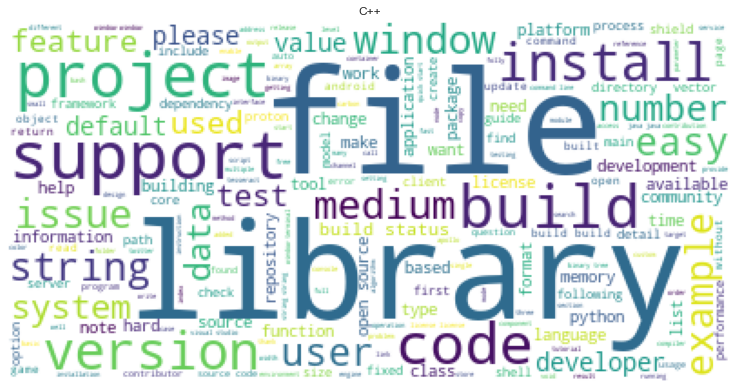

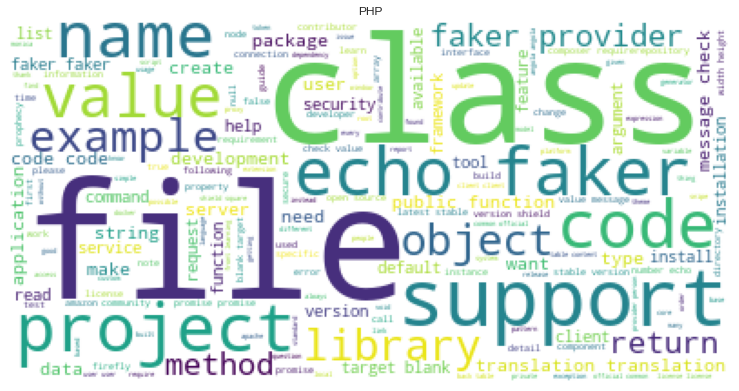

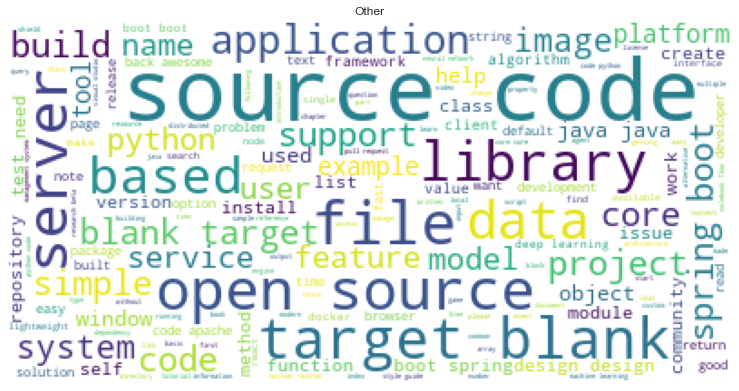

In [10]:
for l in languages:
    
    img = WordCloud(background_color= 'white')\
    .generate(l.words)
    
    plt.imshow(img)
    plt.axis('off')
    plt.title(l.label)
    plt.show()

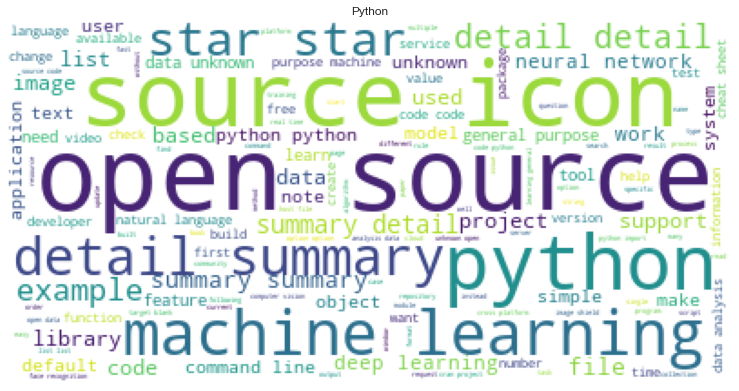

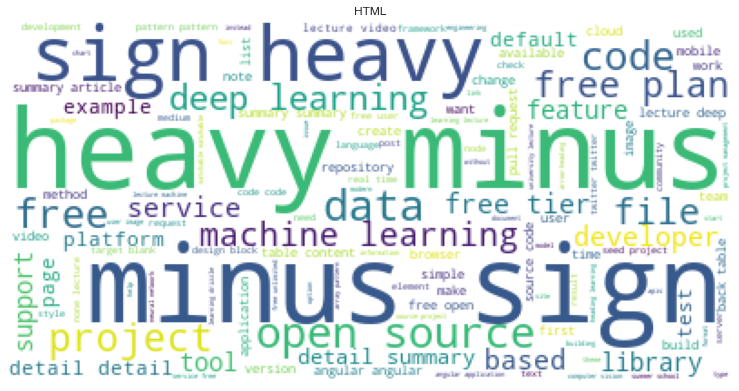

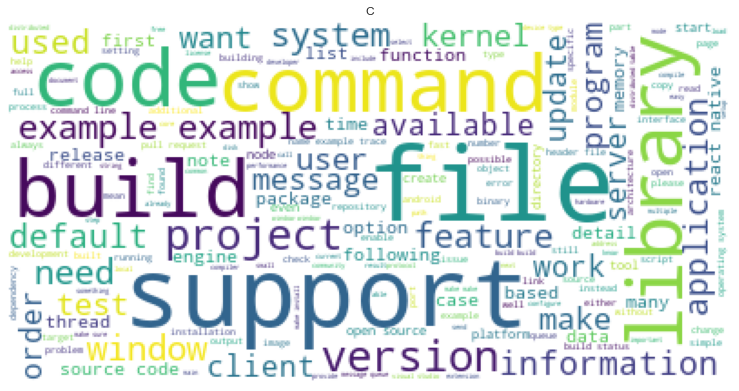

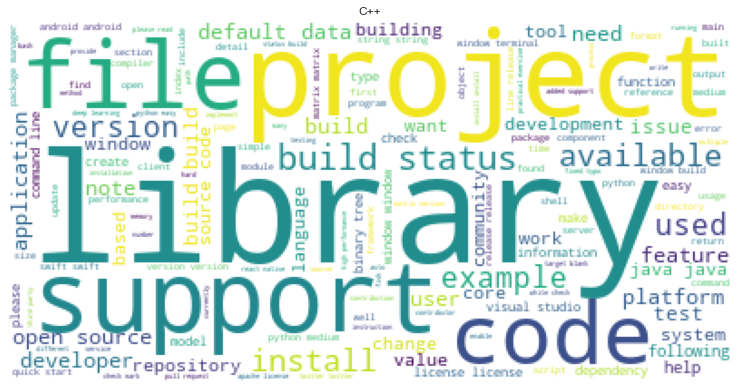

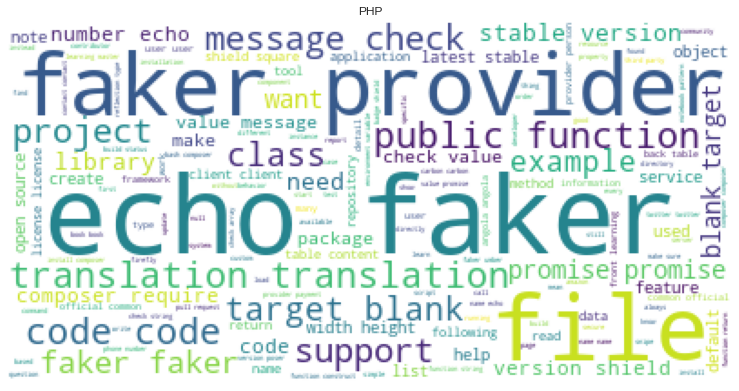

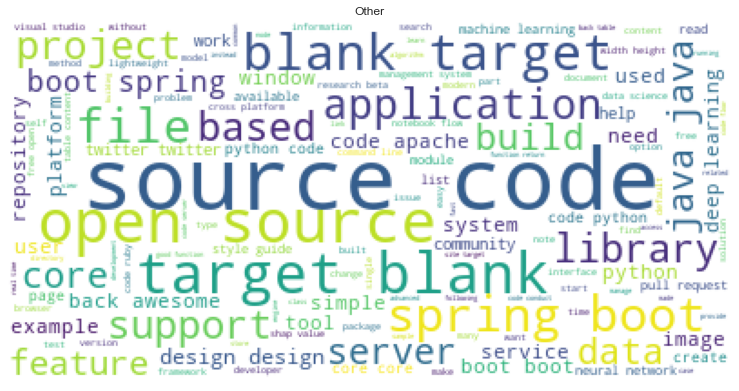

In [11]:
for l in languages:
    
    img = WordCloud(background_color= 'white', collocation_threshold=10)\
    .generate(l.words)
    
    plt.imshow(img)
    plt.axis('off')
    plt.title(l.label)
    plt.show()

In [12]:
# nltk.download('words')

In [13]:
# from nltk.corpus import words as english
# vocab = set(w.lower() for w in english.words())

In [14]:
# len(vocab)

In [18]:
import PIL

In [19]:
# PIL.

In [23]:
import numpy as np

In [46]:
import os

In [124]:
# filename = 'python_logo.jpg'
filename = 'html_logo'

In [125]:
os.path.isfile(filename)

True

In [60]:
from wordcloud import ImageColorGenerator

In [ ]:
# def make_mask(in_put):
#     char_mask = np.array(PIL.Image.open(in_put.filename))    
#     image_colors = ImageColorGenerator(char_mask)
#     mask_dict[f'{in_put}'] = 

In [61]:
# char_mask = np.array(PIL.Image.open(filename))    
# image_colors = ImageColorGenerator(char_mask)

In [129]:
len(char_mask_2.shape)

2

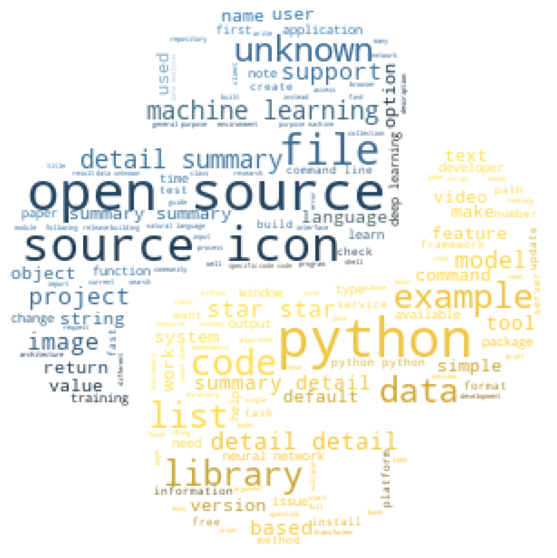

In [121]:
plt.figure(figsize=(10,10))

wc = WordCloud(background_color="white", max_words=200, width=400, height=400, mask=mask, random_state=1).generate(python.words)
# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors))

plt.axis("off")
# plt.tight_layout(pad=0)
# plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [69]:
def transform_zeros(val):
    if val == 0:
        return 255
    else:
        return val
    

In [107]:
vals = [12, 0, 43, 56, 0, 0, 0]

In [108]:
for i in range(len(vals)):
    # print(i)
    vals[i] = transform_zeros(val=vals[i])
    
vals
    

[12, 255, 43, 56, 255, 255, 255]

In [122]:
# for i in range(len(char_mask)):
#     mask[i] = list(map(transform_zeros, char_mask[i]))

In [115]:
char_mask[1][1][1]

0

#### Make the mask for the 3d python jpeg... don't know why it's 3d

In [96]:
mask = np.ndarray((char_mask.shape[0],char_mask.shape[1], char_mask.shape[2]), np.int32)

In [116]:
for i in range(len(char_mask)):
    for j in range(len(char_mask[i])):
        for k in range(len(char_mask[i][j])):
            mask[i][j][k] = transform_zeros(char_mask[i][j][k])
    # print(mask[i])
          # mask[i]= list(map(transform_zeros, char_mask[i]))

In [76]:
len(char_mask)

300

In [93]:
char_mask.shape

(300, 300, 4)

In [94]:
mask.shape

(300, 300)

#### Make the mask for the 2d html file

In [178]:
char_mask_2 = np.array(PIL.Image.open(filename))    
image_colors_2 = ImageColorGenerator(mask_2)

In [130]:
mask_2 = np.ndarray((char_mask_2.shape[0],char_mask_2.shape[1]), np.int32)

In [195]:
def transform_sevens(val):
    if val == 0:
        return 70
    if val == 7:
        return 255
    else:
        return val
    

In [196]:
for i in range(len(char_mask_2)):
    for j in range(len(char_mask_2[i])):
        # for k in range(len(char_mask[i][j])):
            mask_2[i][j] = transform_sevens(char_mask_2[i][j])
    # print(mask[i])
          # mask[i]= list(map(transform_zeros, char_mask[i]))

In [197]:
# mask

In [198]:
char_mask_2.shape

(1600, 1600)

In [199]:
mask_2.shape

(1600, 1600)

In [200]:
mask_2[450]

array([ 70,  70,  70, ..., 255, 255, 255], dtype=int32)

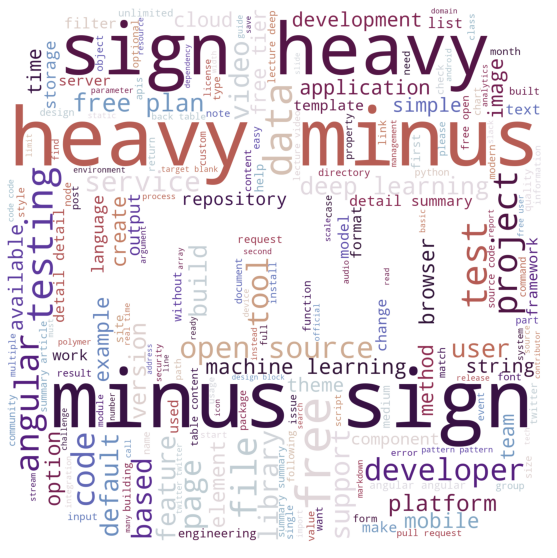

In [208]:
plt.figure(figsize=(10,10))

wc = WordCloud(background_color="white", 
               max_words=200, 
               width=400, 
               height=400, 
               mask=mask_2, 
               prefer_horizontal=0.3,
               random_state=1).generate(html.words)
# to recolour the image
plt.imshow(wc.recolor(colormap='twilight'))#, color_func=image_colors_2))

plt.axis("off")
# plt.tight_layout(pad=0)
# plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
# emoji_mask[emoji_mask == 0] = 255

supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

#### Make The mask for the c logo...

In [250]:
filename = 'c3'

In [251]:
char_mask_c = np.array(PIL.Image.open(filename))

In [252]:
char_mask_c.shape

(275, 474, 3)

In [253]:
mask_c = np.ndarray((char_mask_c.shape[0],char_mask_c.shape[1], char_mask_c.shape[2]), np.int32)

In [254]:
mask_c.shape

(275, 474, 3)

In [255]:
char_mask_c

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [245]:
def transform_255s(val):
    if val == 255:
        return 1
    # if val == 7:
        # return 255
    else:
        return val
    

In [246]:
for i in range(len(char_mask_c)):
    for j in range(len(char_mask_c[i])):
        for k in range(len(char_mask_c[i][j])):
            mask_c[i][j][k] = transform_255s(char_mask_c[i][j][k])
    # print(mask[i])
          # mask[i]= list(map(transform_zeros, char_mask[i]))

In [256]:
mask_c = char_mask_c

In [257]:
image_colors_c = ImageColorGenerator(mask_c)

In [258]:
mask_c[27]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

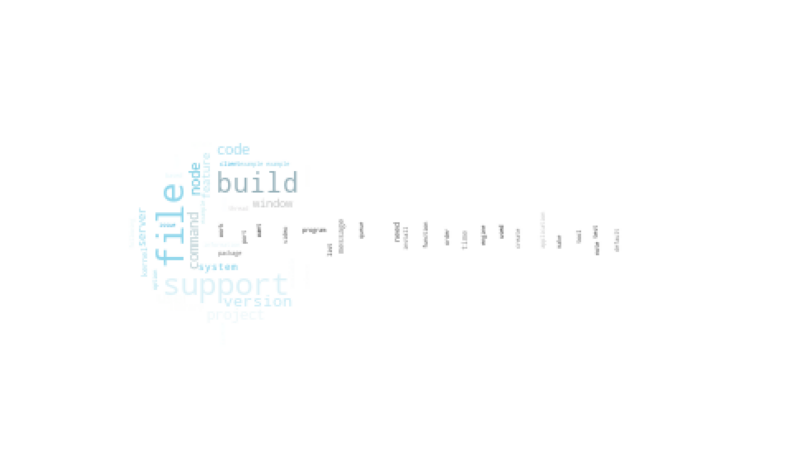

In [260]:
plt.figure(figsize=(14,14))

wc = WordCloud(background_color="white", 
               max_words=200, 
               width=400, 
               height=400, 
               mask=mask_c, 
               prefer_horizontal=0.3,
               random_state=1).generate(c.words)
# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors_c))

plt.axis("off")
# plt.tight_layout(pad=0)
# plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Make The mask for the c4 logo...

In [398]:
filename = 'c4.png'

In [399]:
char_mask_c = np.array(PIL.Image.open(filename))

In [400]:
char_mask_c.shape

(555, 474, 3)

In [401]:
mask_c = np.ndarray((char_mask_c.shape[0],char_mask_c.shape[1], char_mask_c.shape[2]), np.int32)

In [402]:
mask_c.shape

(555, 474, 3)

In [403]:
char_mask_c

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [252, 252, 252],
        ...,
        [252, 252, 252],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [252, 252, 252],
        [249, 249, 249],
        ...,
        [248, 248, 248],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[245, 245, 245],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [247, 247, 247],
        [255, 255, 255],
        [253, 253, 253]],

       [[247, 247, 247],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [248, 248, 248]],

       [[249, 249, 249],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [253, 253, 253],
        [246, 246, 246]]

In [404]:
def transform_222s(val):
    if val > 222:
        return 255
    # if val == 7:
        # return 255
    else:
        return val
    

In [405]:
for i in range(len(char_mask_c)):
    for j in range(len(char_mask_c[i])):
        for k in range(len(char_mask_c[i][j])):
            mask_c[i][j][k] = transform_222s(char_mask_c[i][j][k])
    # print(mask[i])
          # mask[i]= list(map(transform_zeros, char_mask[i]))

In [268]:
mask_c = char_mask_c

In [406]:
image_colors_c = ImageColorGenerator(mask_c)

In [407]:
mask_c[27]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=int32)

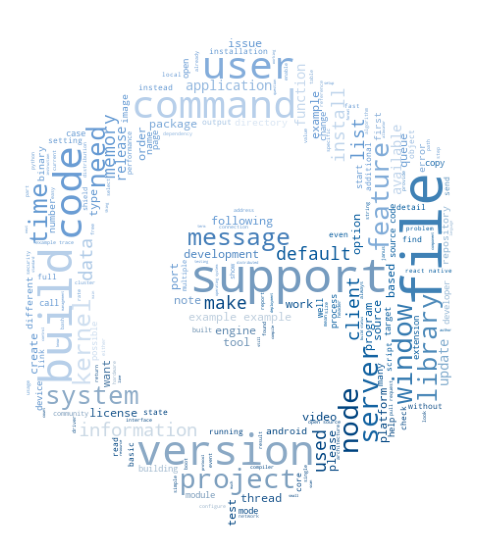

In [408]:
plt.figure(figsize=(10,10))

wc = WordCloud(background_color="white", 
               max_words=200, 
               width=400, 
               height=400, 
               mask=mask_c, 
               prefer_horizontal=0.3,
               random_state=1).generate(c.words)
# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors_c))

plt.axis("off")
# plt.tight_layout(pad=0)
# plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Make The mask for the php_logo...

In [394]:
filename = 'php3.png'

In [316]:
char_mask_php = np.array(PIL.Image.open(filename))

In [317]:
char_mask_php.shape

(251, 474, 3)

In [318]:
mask_php = np.ndarray((char_mask_php.shape[0],char_mask_php.shape[1], char_mask_php.shape[2]), np.int32)

In [319]:
mask_php.shape

(251, 474, 3)

In [320]:
char_mask_php

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [333]:
def transform_242s(val):
    if val > 242:
        return 1
    if val < 30:
        return 255
    # if val == 7:
        # return 255
    else:
        return val
    

In [334]:
for i in range(len(char_mask_php)):
    for j in range(len(char_mask_php[i])):
        for k in range(len(char_mask_php[i][j])):
            mask_php[i][j][k] = transform_242s(char_mask_php[i][j][k])
    # print(mask[i])
          # mask[i]= list(map(transform_zeros, char_mask[i]))

In [294]:
mask_php = char_mask_php

In [335]:
image_colors_php = ImageColorGenerator(mask_php)

In [336]:
# mask_c[27]

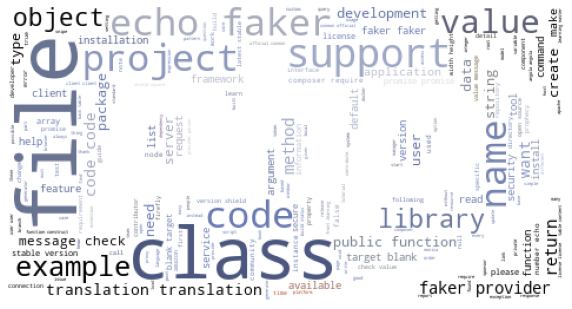

In [409]:
plt.figure(figsize=(10,10))

wc = WordCloud(background_color="white", 
               max_words=200, 
               width=400, 
               height=400, 
               mask=mask_php, 
               prefer_horizontal=0.3,
               random_state=1).generate(php.words)
# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors_php))

plt.axis("off")
# plt.tight_layout(pad=0)
# plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Make The mask for the c++ logo...

In [393]:
filename = 'cplusplus_logo.png'

In [342]:
char_mask_cpp = np.array(PIL.Image.open(filename))

In [343]:
char_mask_cpp.shape

(266, 474, 3)

In [344]:
mask_cpp = np.ndarray((char_mask_cpp.shape[0],char_mask_cpp.shape[1], char_mask_cpp.shape[2]), np.int32)

In [345]:
mask_cpp.shape

(266, 474, 3)

In [346]:
char_mask_cpp

array([[[ 43, 124, 187],
        [ 42, 123, 186],
        [ 41, 122, 185],
        ...,
        [ 41, 121, 182],
        [ 44, 124, 185],
        [ 43, 124, 187]],

       [[ 43, 124, 187],
        [ 42, 123, 186],
        [ 41, 121, 184],
        ...,
        [ 41, 121, 182],
        [ 43, 123, 184],
        [ 42, 123, 186]],

       [[ 42, 123, 186],
        [ 42, 122, 185],
        [ 41, 121, 182],
        ...,
        [ 40, 120, 181],
        [ 43, 123, 184],
        [ 43, 123, 186]],

       ...,

       [[ 46, 122, 184],
        [ 45, 121, 183],
        [ 44, 120, 182],
        ...,
        [ 41, 120, 177],
        [ 42, 121, 178],
        [ 44, 120, 178]],

       [[ 56, 132, 194],
        [ 47, 123, 185],
        [ 44, 120, 182],
        ...,
        [ 42, 121, 178],
        [ 47, 123, 181],
        [ 57, 132, 189]],

       [[ 57, 131, 194],
        [ 48, 122, 185],
        [ 45, 119, 182],
        ...,
        [ 42, 121, 178],
        [ 47, 124, 180],
        [ 57, 132, 189]]

In [272]:
def transform_222s(val):
    if val > 222:
        return 255
    # if val == 7:
        # return 255
    else:
        return val
    

In [353]:
for i in range(len(char_mask_cpp)):
    for j in range(len(char_mask_cpp[i])):
        for k in range(len(char_mask_cpp[i][j])):
            mask_cpp[i][j][k] = transform_222s(char_mask_cpp[i][j][k])
    # print(mask[i])
          # mask[i]= list(map(transform_zeros, char_mask[i]))

In [347]:
mask_cpp = char_mask_cpp

In [354]:
image_colors_cpp = ImageColorGenerator(mask_cpp)

In [355]:
mask_cpp[133]

array([[ 77, 140, 191],
       [ 76, 140, 188],
       [ 75, 139, 187],
       ...,
       [ 72, 138, 188],
       [ 75, 141, 193],
       [ 75, 140, 194]], dtype=uint8)

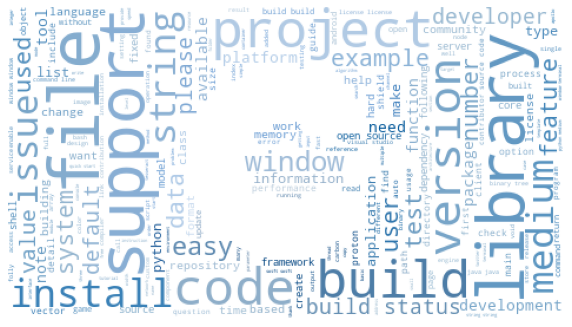

In [356]:
plt.figure(figsize=(10,10))

wc = WordCloud(background_color="white", 
               max_words=200, 
               width=400, 
               height=400, 
               mask=mask_cpp, 
               prefer_horizontal=0.3,
               random_state=1).generate(cplusplus.words)
# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors_cpp))

plt.axis("off")
# plt.tight_layout(pad=0)
# plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Make The mask for the python_2 logo...

In [392]:
filename = 'python_logo_2.png'

In [359]:
char_mask_p2 = np.array(PIL.Image.open(filename))

In [360]:
char_mask_p2.shape

(200, 474, 3)

In [361]:
mask_p2 = np.ndarray((char_mask_p2.shape[0],char_mask_p2.shape[1], char_mask_p2.shape[2]), np.int32)

In [362]:
mask_p2.shape

(200, 474, 3)

In [363]:
char_mask_p2

array([[[ 60, 118, 166],
        [ 59, 117, 165],
        [ 57, 115, 163],
        ...,
        [224, 219, 161],
        [252, 241, 149],
        [255, 243, 124]],

       [[ 59, 117, 165],
        [ 58, 116, 164],
        [ 57, 115, 163],
        ...,
        [228, 223, 142],
        [253, 241, 139],
        [255, 241, 125]],

       [[ 58, 116, 164],
        [ 57, 115, 163],
        [ 55, 113, 161],
        ...,
        [239, 231, 120],
        [248, 235, 120],
        [253, 234, 116]],

       ...,

       [[ 38, 122, 159],
        [ 44, 120, 170],
        [ 52, 113, 176],
        ...,
        [254, 232, 112],
        [255, 234, 115],
        [255, 234, 115]],

       [[ 55, 110, 210],
        [ 50, 101, 190],
        [ 70, 111, 177],
        ...,
        [255, 233, 113],
        [254, 232, 113],
        [254, 232, 113]],

       [[ 77, 118, 224],
        [ 65, 100, 190],
        [ 76, 103, 156],
        ...,
        [255, 234, 115],
        [253, 231, 112],
        [253, 230, 114]]

In [272]:
def transform_222s(val):
    if val > 222:
        return 255
    # if val == 7:
        # return 255
    else:
        return val
    

In [273]:
for i in range(len(char_mask_c)):
    for j in range(len(char_mask_c[i])):
        for k in range(len(char_mask_c[i][j])):
            mask_c[i][j][k] = transform_222s(char_mask_c[i][j][k])
    # print(mask[i])
          # mask[i]= list(map(transform_zeros, char_mask[i]))

In [364]:
mask_p2 = char_mask_p2

In [365]:
image_colors_p2 = ImageColorGenerator(mask_p2)

In [366]:
mask_p2[27]

array([[ 56, 114, 162],
       [ 55, 113, 161],
       [ 53, 111, 159],
       ...,
       [254, 230, 108],
       [255, 234, 112],
       [255, 234, 112]], dtype=uint8)

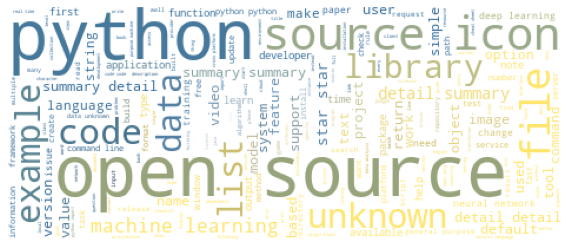

In [367]:
plt.figure(figsize=(10,10))

wc = WordCloud(background_color="white", 
               max_words=200, 
               width=400, 
               height=400, 
               mask=mask_p2, 
               prefer_horizontal=0.3,
               random_state=1).generate(python.words)
# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors_p2))

plt.axis("off")
# plt.tight_layout(pad=0)
# plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Make The mask for the python_3 logo...

In [391]:
filename = 'py3.png'

In [370]:
char_mask_p3 = np.array(PIL.Image.open(filename))

In [371]:
char_mask_p3.shape

(474, 474, 3)

In [372]:
mask_p3 = np.ndarray((char_mask_p3.shape[0],char_mask_p3.shape[1], char_mask_p3.shape[2]), np.int32)

In [373]:
mask_p3.shape

(474, 474, 3)

In [374]:
char_mask_p3

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [253, 253, 253],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [253, 253, 253],
        [253, 253, 253]]

In [272]:
def transform_222s(val):
    if val > 222:
        return 255
    # if val == 7:
        # return 255
    else:
        return val
    

In [273]:
for i in range(len(char_mask_c)):
    for j in range(len(char_mask_c[i])):
        for k in range(len(char_mask_c[i][j])):
            mask_c[i][j][k] = transform_222s(char_mask_c[i][j][k])
    # print(mask[i])
          # mask[i]= list(map(transform_zeros, char_mask[i]))

In [375]:
mask_p3 = char_mask_p3

In [376]:
image_colors_p3 = ImageColorGenerator(mask_p3)

In [377]:
mask_p3[27]

array([[254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       ...,
       [254, 254, 254],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

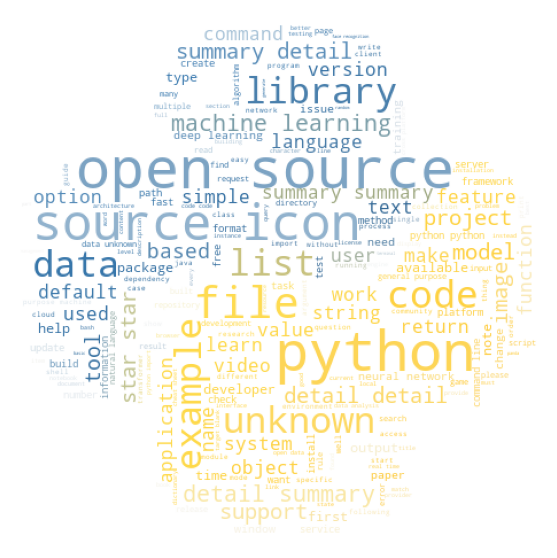

In [379]:
plt.figure(figsize=(10,10))

wc = WordCloud(background_color="white", 
               max_words=200, 
               width=400, 
               height=400, 
               mask=mask_p3, 
               prefer_horizontal=0.8,
               random_state=1).generate(python.words)
# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors_p3))

plt.axis("off")
# plt.tight_layout(pad=0)
# plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Make The mask for the other logo...

In [390]:
filename = 'other_logo.png'

In [381]:
char_mask_o = np.array(PIL.Image.open(filename))

In [382]:
char_mask_o.shape

(263, 474, 3)

In [383]:
mask_o = np.ndarray((char_mask_o.shape[0],char_mask_o.shape[1], char_mask_o.shape[2]), np.int32)

In [384]:
mask_o.shape

(263, 474, 3)

In [385]:
char_mask_o

array([[[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [244, 244, 244],
        [242, 242, 242],
        [242, 242, 242]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [245, 245, 245],
        [240, 240, 240],
        [240, 240, 240]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [244, 244, 244],
        [235, 235, 235],
        [235, 235, 235]],

       ...,

       [[231, 231, 231],
        [235, 235, 235],
        [232, 232, 232],
        ...,
        [243, 243, 243],
        [254, 254, 254],
        [254, 254, 254]],

       [[235, 235, 235],
        [240, 240, 240],
        [238, 238, 238],
        ...,
        [248, 248, 248],
        [254, 254, 254],
        [254, 254, 254]],

       [[236, 236, 236],
        [243, 243, 243],
        [241, 241, 241],
        ...,
        [251, 251, 251],
        [253, 253, 253],
        [253, 253, 253]]

In [272]:
def transform_222s(val):
    if val > 222:
        return 255
    # if val == 7:
        # return 255
    else:
        return val
    

In [273]:
for i in range(len(char_mask_c)):
    for j in range(len(char_mask_c[i])):
        for k in range(len(char_mask_c[i][j])):
            mask_c[i][j][k] = transform_222s(char_mask_c[i][j][k])
    # print(mask[i])
          # mask[i]= list(map(transform_zeros, char_mask[i]))

In [386]:
mask_o = char_mask_o

In [387]:
image_colors_o = ImageColorGenerator(mask_o)

In [388]:
mask_o[27]

array([[240, 240, 240],
       [237, 237, 237],
       [230, 230, 230],
       ...,
       [247, 247, 247],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

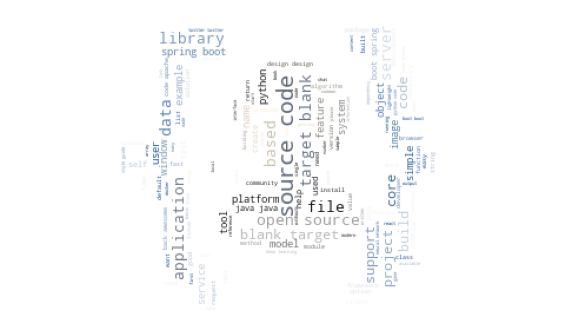

In [389]:
plt.figure(figsize=(10,10))

wc = WordCloud(background_color="white", 
               max_words=200, 
               width=400, 
               height=400, 
               mask=mask_o, 
               prefer_horizontal=0.3,
               random_state=1).generate(other.words)
# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors_o))

plt.axis("off")
# plt.tight_layout(pad=0)
# plt.imshow(wordcloud, interpolation='bilinear')
plt.show()